In [1]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from numpy import pi
from scipy.special import jv
import math
from pathlib import Path
import matplotlib.pyplot as plt
cm_unit = 1/2.54
# figsize = (4.6,4.6)
figsize = (6.4, 4)
fontsize = 9
PlotParams(fontsize=fontsize)
save_dir = Path().absolute().parent.parent/"figures"/"thesis"/"black_hole"


### Get Ham from gradient

In [2]:
Ndiffs = 12
ymin = -0.35#jv(0, 3.8316) 
print(ymin)
tunnellings = np.linspace(-ymin, ymin, Ndiffs) # for linear
tunnellings = tunnellings[::-1]
#get A vals to get the right gradient
omega = 25
# print(gradients)
drive_style = "alternating"

xvals = ComputeAValsFromRequiredGradients(tunnellings)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
print(A_vals)

_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
                        2*pi/omega,
                        circle_boundary = 0
                        )

#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)

-0.35
[-41.58129882  41.58129882 -35.45076338  36.94394738 -31.51095737
  33.41739639 -28.25614112  30.35071075 -25.32198388  27.50906476
 -22.54137143  24.7631676  -19.80617506]
Ham is real


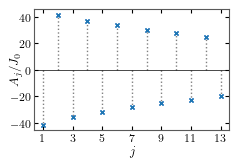

In [4]:

fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, cm_unit*figsize[1]))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
markerline, stemlines, baseline = ax.stem(range(N),
                                           A_vals, linefmt=':', markerfmt='x',
                                           basefmt=" "
)
stemlines.set_linewidth(1)
stemlines.set_color("0.5")

markerline.set_markersize(3)
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ylabel_coords = (-0.06,0.5)
xlabel_coords = (0.5,-0.12)

ax.set_ylabel(r"$A_j/J_0$", rotation=90)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
# ax.set_yticks(axes_tick_pos)
# ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

xticks = np.arange(0,N,2)
ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks])#, font="stix", fontsize=fontsize*0.9)

# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"a_vals_alternating.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()

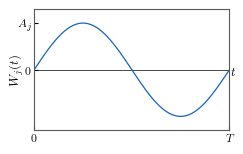

In [5]:
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, cm_unit*figsize[1]))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
t = np.linspace(0,2*pi, 200)
ax.plot(t, np.sin(t), c="#1565C0", lw = 0.9)

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel(r"$W_j(t)$")
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks([0,1])
ax.set_yticklabels([r"$0$", r"$A_j$"])#, font="stix", fontsize=fontsize*0.9)
ax.set_ylim([-1.3, 1.3])

xticks = np.arange(0,N,2)
ax.set_xlabel(r"$t$")
ax.xaxis.set_label_coords(1.02,0.53)
ax.set_xticks([0, 2*pi])
ax.set_xticklabels([r"$0$", r"$T$"])#, font="stix", fontsize=fontsize*0.9)
ax.set_xlim([0,2.0*pi])

fig.savefig(save_dir/"epsilon_j(t).pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()